<a href="https://colab.research.google.com/github/jklm23/zuheyouhua/blob/main/%E7%BB%84%E5%90%88%E4%BC%98%E5%8C%96%E5%AE%9E%E9%AA%8C%E4%B8%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

使用IMDB电影评论数据集进行正面/负面情绪分类。

In [6]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
import tensorflow as tf

准备训练数据

In [7]:
max_features = 10000   # 特征单词数
maxlen = 500    # 单词截断
batch_size = 32
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/root/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/root/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you mea

构建训练模型

In [9]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_features, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

编译模型，配置训练过程：

In [10]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

模型训练

In [11]:
history = model.fit(input_train,y_train, epochs=10,
                    batch_size=batch_size,validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 222s 349ms/step - loss: 0.6637 - accuracy: 0.5285 - val_loss: 0.3449 - val_accuracy: 0.8364
Epoch 2/10
625/625 [==============================] - 214s 343ms/step - loss: 0.2814 - accuracy: 0.8873 - val_loss: 0.2902 - val_accuracy: 0.8882
Epoch 3/10
625/625 [==============================] - 219s 350ms/step - loss: 0.2024 - accuracy: 0.9232 - val_loss: 0.2724 - val_accuracy: 0.8852
Epoch 4/10
625/625 [==============================] - 215s 344ms/step - loss: 0.1544 - accuracy: 0.9427 - val_loss: 0.3083 - val_accuracy: 0.8920
Epoch 5/10
625/625 [==============================] - 216s 346ms/step - loss: 0.1271 - accuracy: 0.9537 - val_loss: 0.3357 - val_accuracy: 0.8814
Epoch 6/10
625/625 [==============================] - 218s 349ms/step - loss: 0.0981 - accuracy: 0.9673 - val_loss: 0.3428 - val_accuracy: 0.8740
Epoch 7/10
625/625 [==============================] - 216s 345ms/step - loss: 0.0775 - accuracy: 0.9743 - val_loss: 0.3750 -

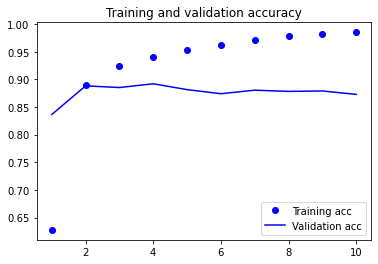

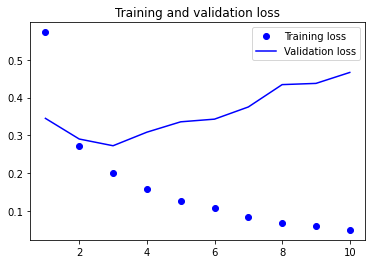

In [14]:
import matplotlib.pyplot as plt
# 绘制结果
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [13]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])
